**Mall Customers Clustering Analysis**

**Installing the Libraries**

In [1]:
# Install dabl if not already installed
# Uncomment the line below if you need to install dabl
# !pip install dabl

In [2]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for data analysis
import dabl

**Reading the Dataset**

In [3]:
# importing the dataset
data = pd.read_csv('Mall_Customers.csv')

## Examining Data

In [4]:
# lets check the shape of the dataset
print("Shape of the dataset :", data.shape)

Shape of the dataset : (200, 5)


In [5]:
# lets check the head of the data
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# lets check the tail of the data
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
# lets check sample of the data
data.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
48,49,Female,29,40,42
87,88,Female,22,57,55
141,142,Male,32,75,93


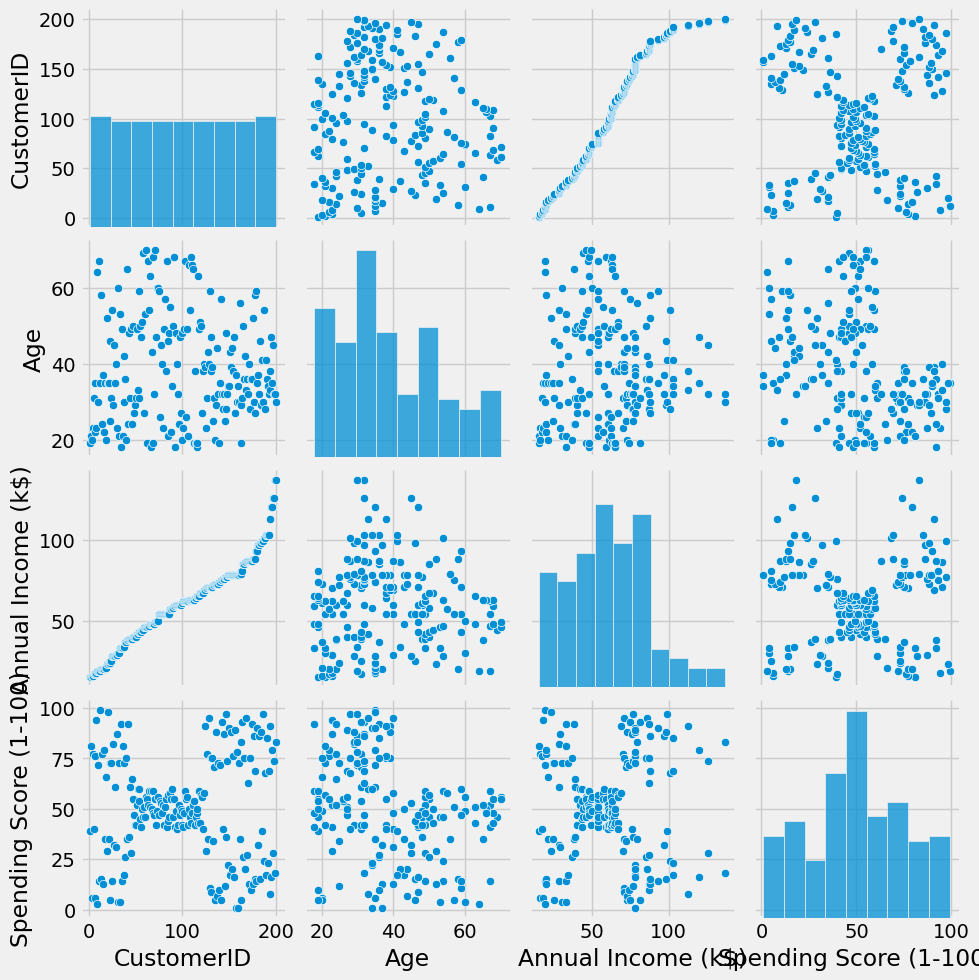

In [8]:
# lets get the pairplot for the data
sns.pairplot(data)
plt.show()

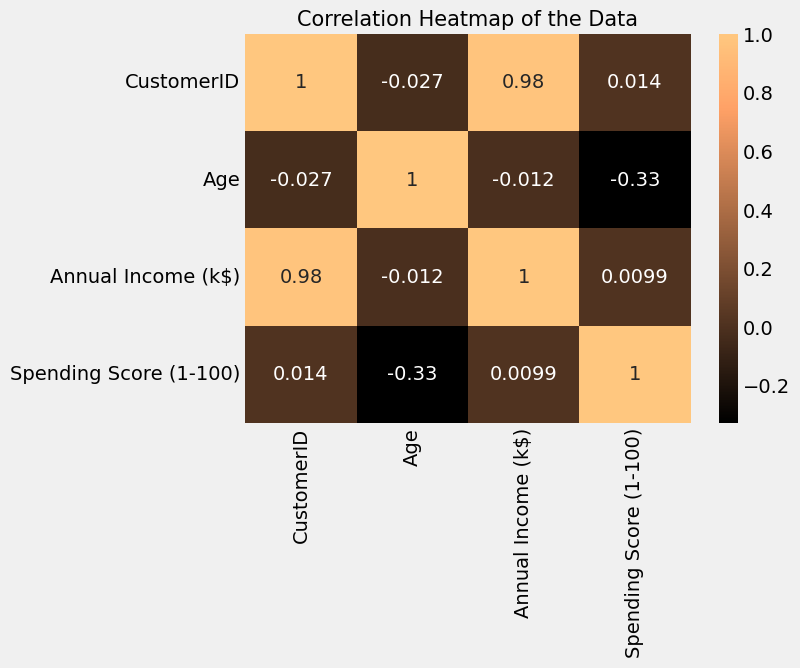

In [9]:
# lets check the Correlation Heat Map of the Data

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr(), annot = True, cmap = 'copper')
plt.title('Correlation Heatmap of the Data', fontsize = 15)
plt.show()

Target looks like regression


c:\Users\PRIYANSH DIXIT\AppData\Local\Programs\Python\Python310\lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Spending Score (1...', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=-3.45E-01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=5.56E-02'}, xlabel='Spending Score (1-100)', ylabel='Gender'>]],
       dtype=object)]

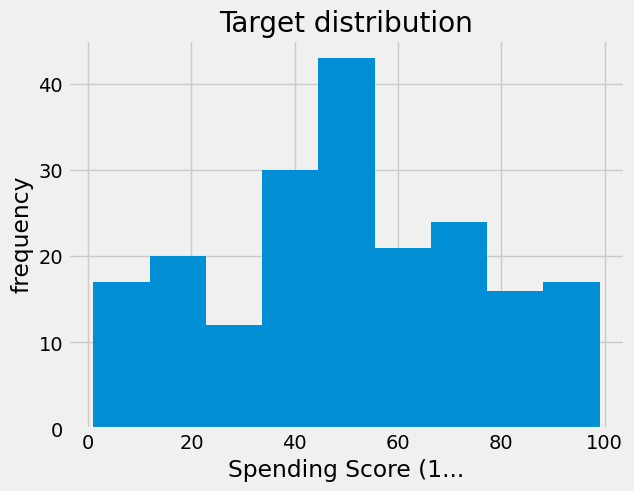

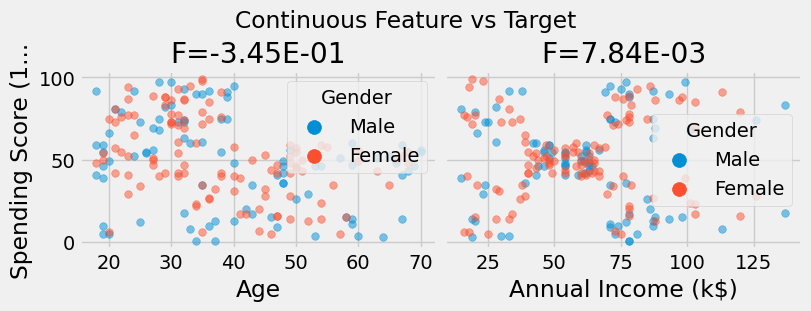

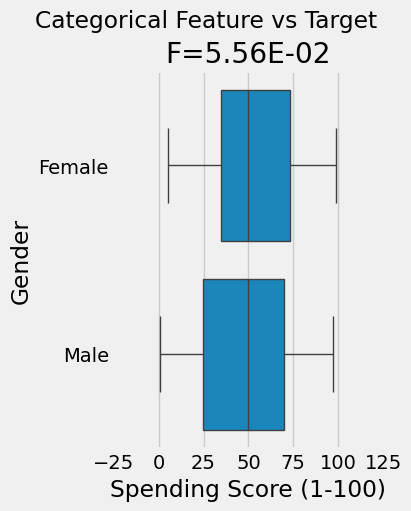

In [10]:
# lets analyze the data with respect to Spending Score
dabl.plot(data, target_col = 'Spending Score (1-100)')

Target looks like regression


c:\Users\PRIYANSH DIXIT\AppData\Local\Programs\Python\Python310\lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='Annual Income (k$)', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=1.98E-02'}, xlabel='Age', ylabel='Annual Income (k$)'>,
         <Axes: title={'center': 'F=7.84E-03'}, xlabel='Spending Score (1-100)'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=2.33E-05'}, xlabel='Annual Income (k$)', ylabel='Gender'>]],
       dtype=object)]

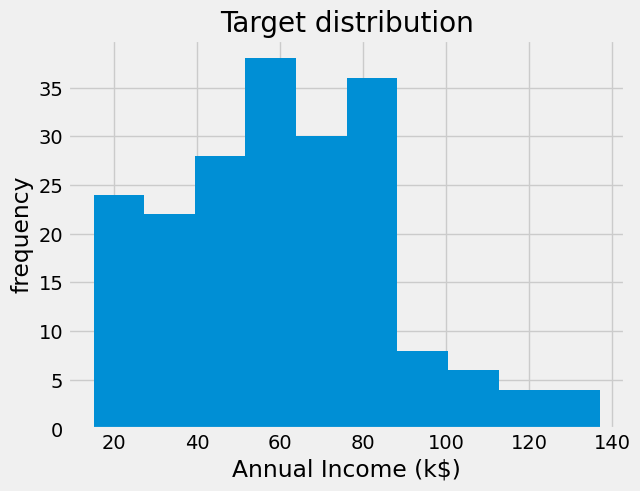

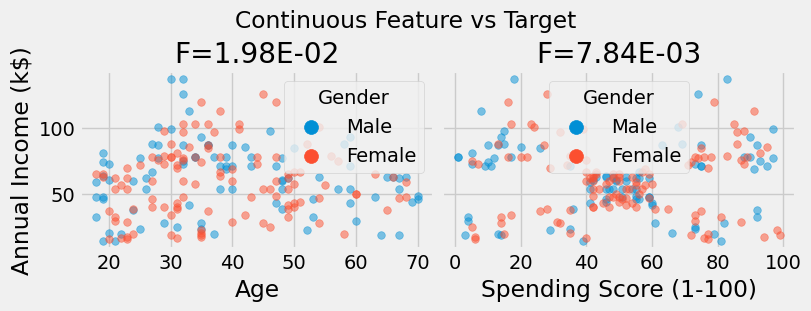

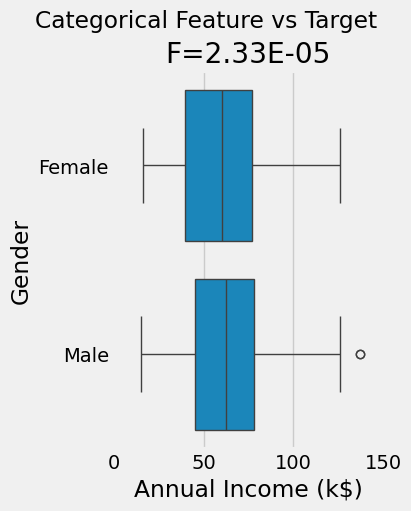

In [11]:
# lets analyze the data with respect to Annual Income
dabl.plot(data, target_col = 'Annual Income (k$)')

## Descriptive Statistics

In [12]:
# describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
# describing the categorical data
data.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [14]:
# checking if there is any NULL data
data.isnull().any().any()

np.False_

## Data Visualization

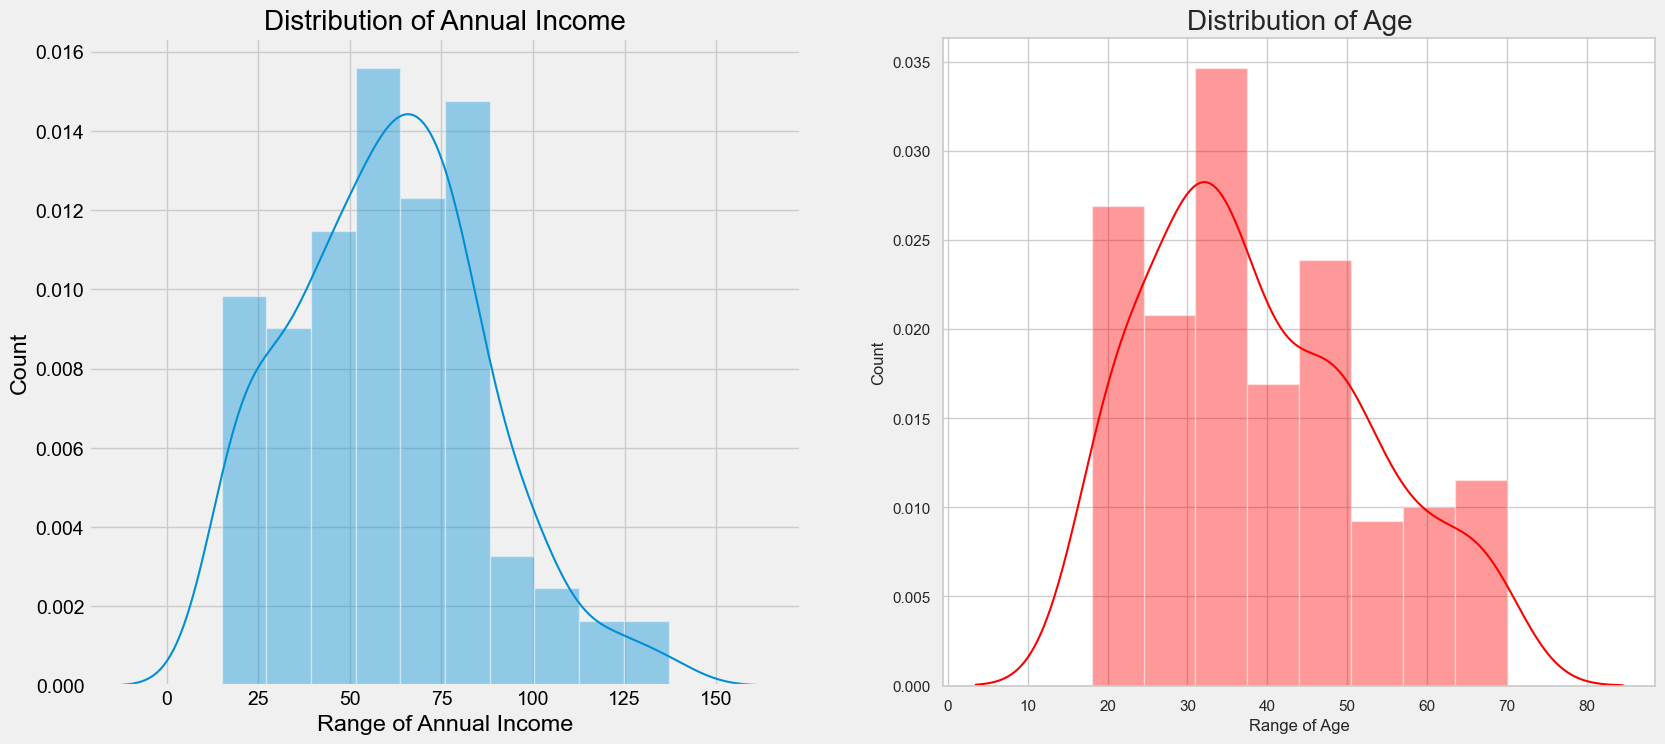

In [15]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

> Here, In the above Plots we can see the Distribution pattern of Annual Income and Age, By looking at the plots, 

>> we can infer one thing that There are few people who earn more than 100K US Dollars.
>> Most of the people have an earning of around 50-75K  US Dollars.
>> Also, we can say that the least Income is around 20K US Dollars.

> Taking inferences about the Customers.
>> The most regular customers for the Mall has age around 30-35 years of age.
>> Whereas the the senior citizens age group is the least frequent visitor in the Mall.
>> Youngsters are lesser in umber as compared to the Middle aged people.


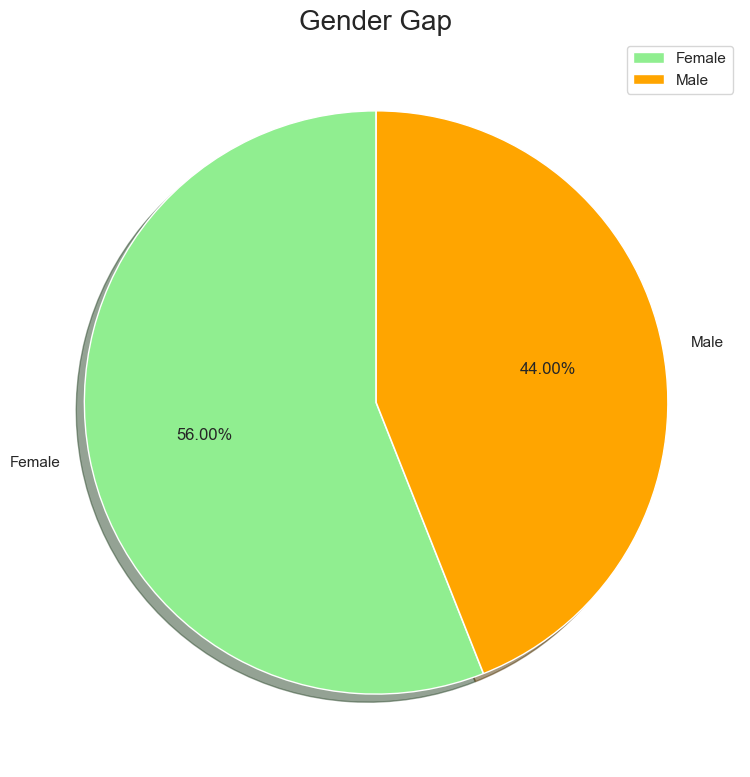

In [16]:
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

> By looking at the above pie chart which explains about the distribution of Gender in the Mall
>> Interestingly, The Females are in the lead with a share of 56% whereas the Males have a share of 44%, that's a huge gap specially when the population of Males is comparatively higher than Females.

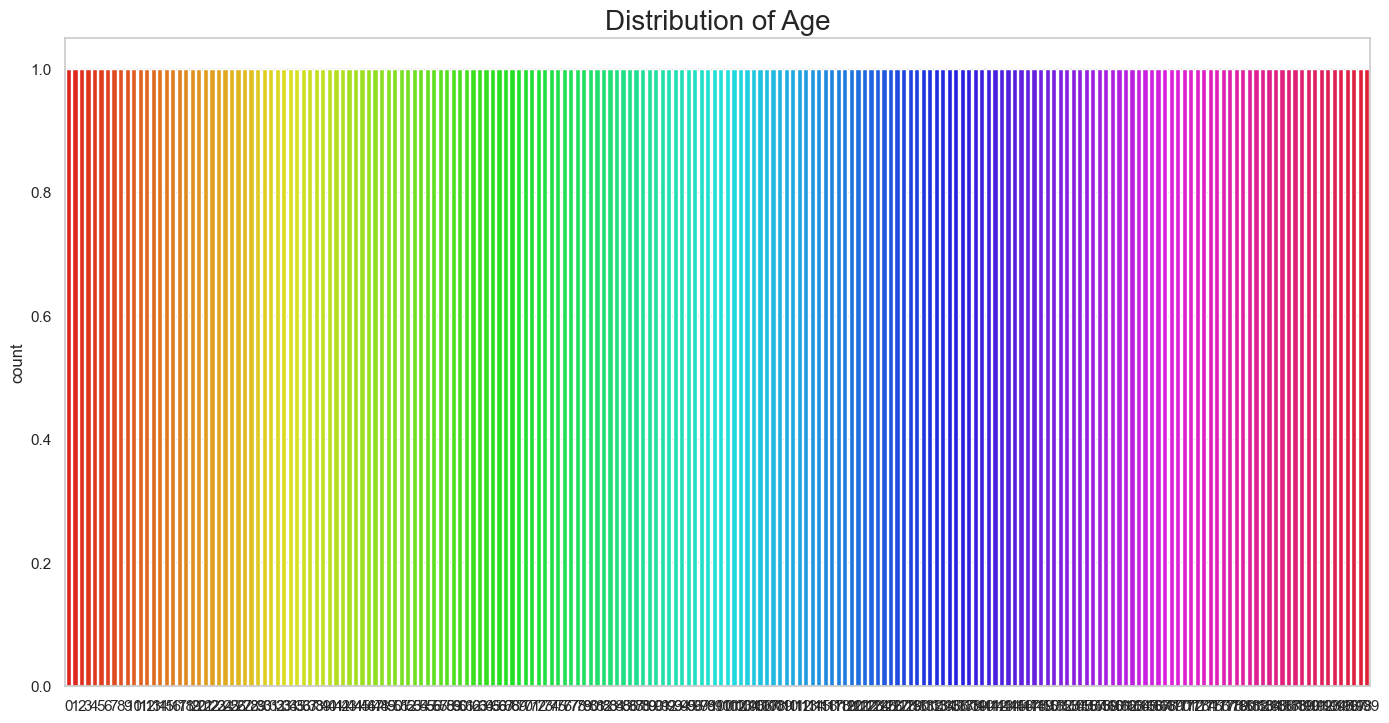

In [17]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

> This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall.
>> By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison.
>> Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67.
>> People of Age 55, 56, 69, 64 are very less frequent in the Malls.
>> People at Age 32 are the Most Frequent Visitors in the Mall.

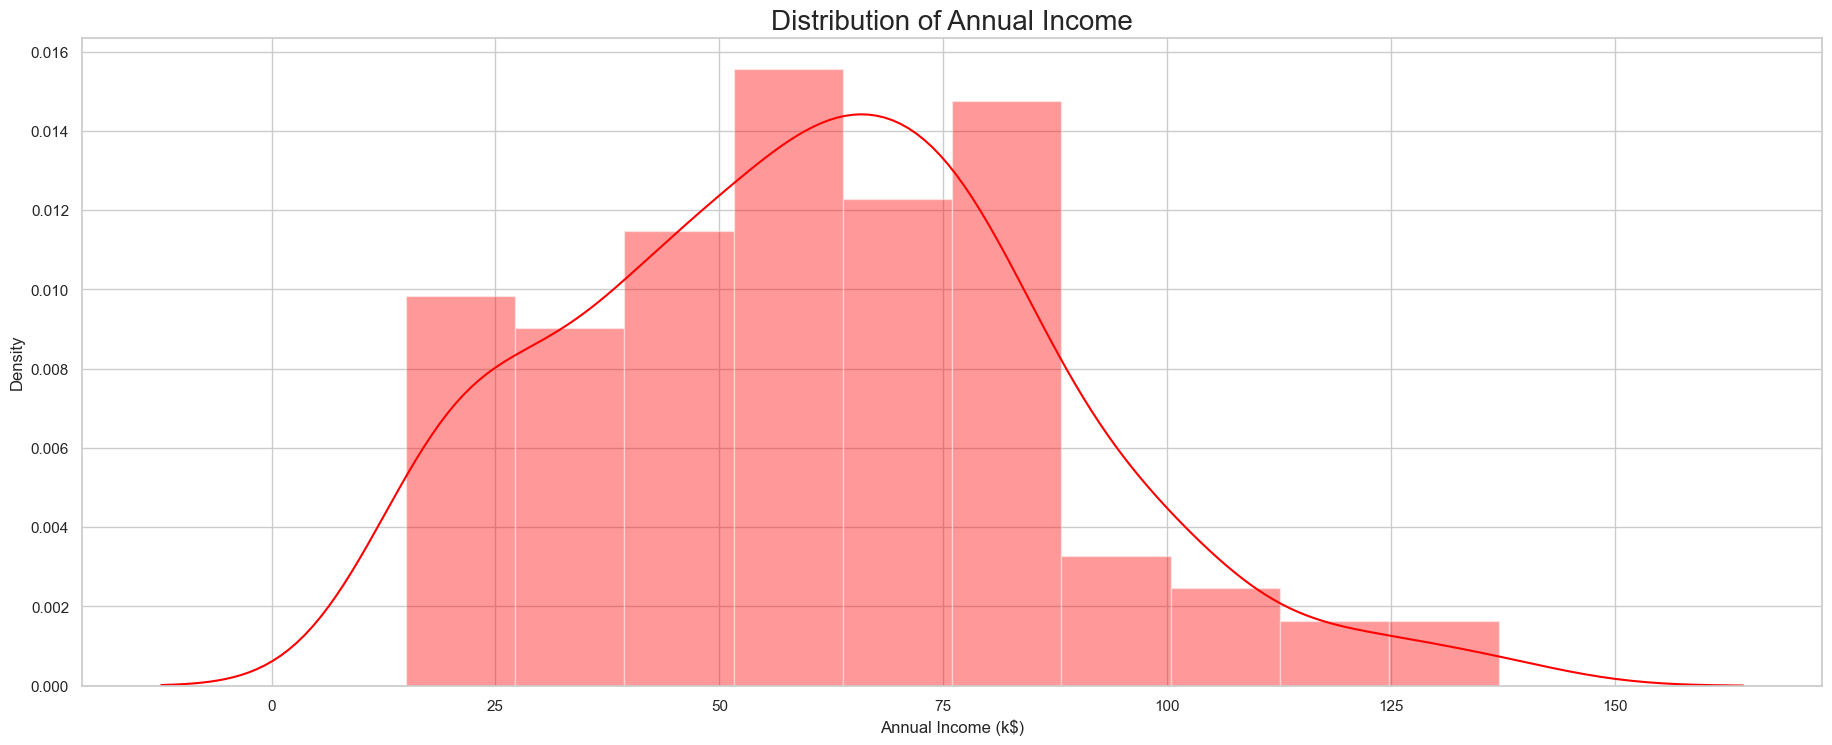

In [18]:
# lets check the sitribution of Annual Income

plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Annual Income (k$)'], color = 'red')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

> Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars.
> There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.

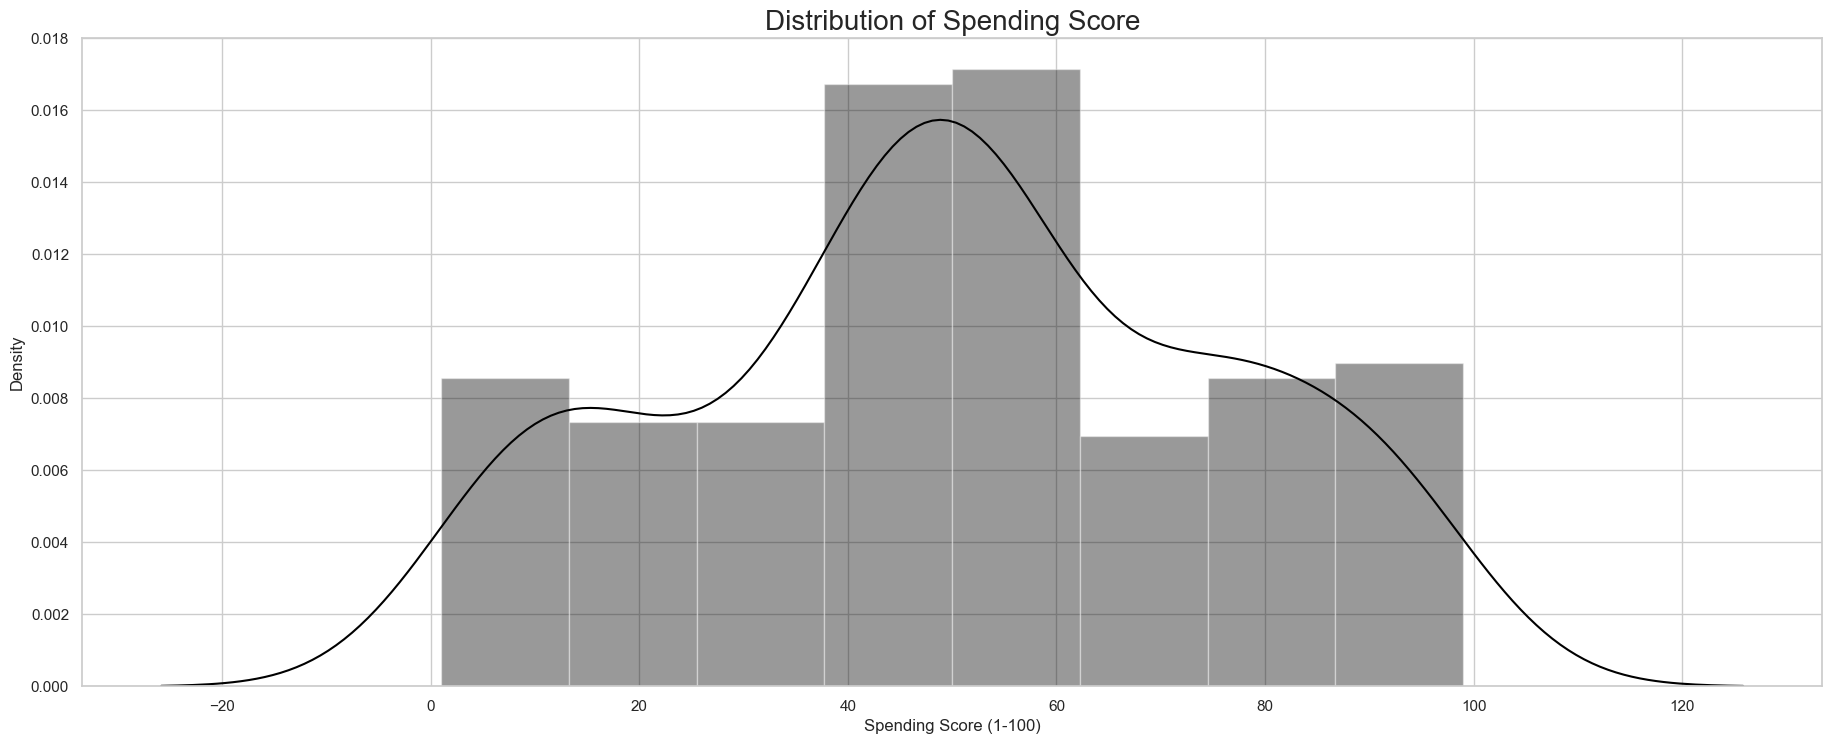

In [19]:
# lets check the distribution of Spending Score

plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(data['Spending Score (1-100)'], color = 'black')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

> This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.
>> On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60.
>> Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

> The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.
>> We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

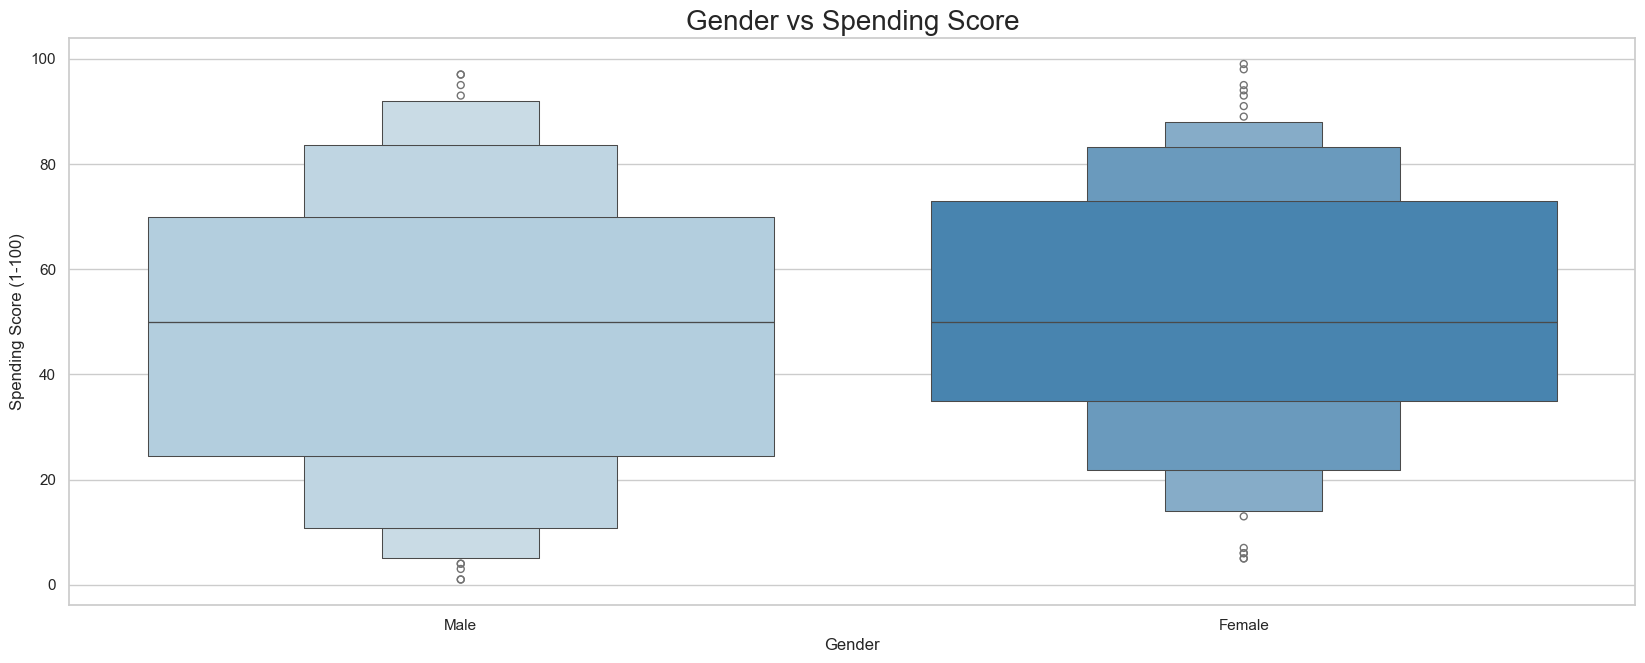

In [20]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(x=data['Gender'], y=data['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

> Bi-variate Analysis between Gender and Spending Score, 
>> It is clearly visible that the most of the males have a Spending Score of around 25  to 70  whereas the Females have a spending score of around 35  to 75 . which again points to the fact that women are Shopping Leaders.

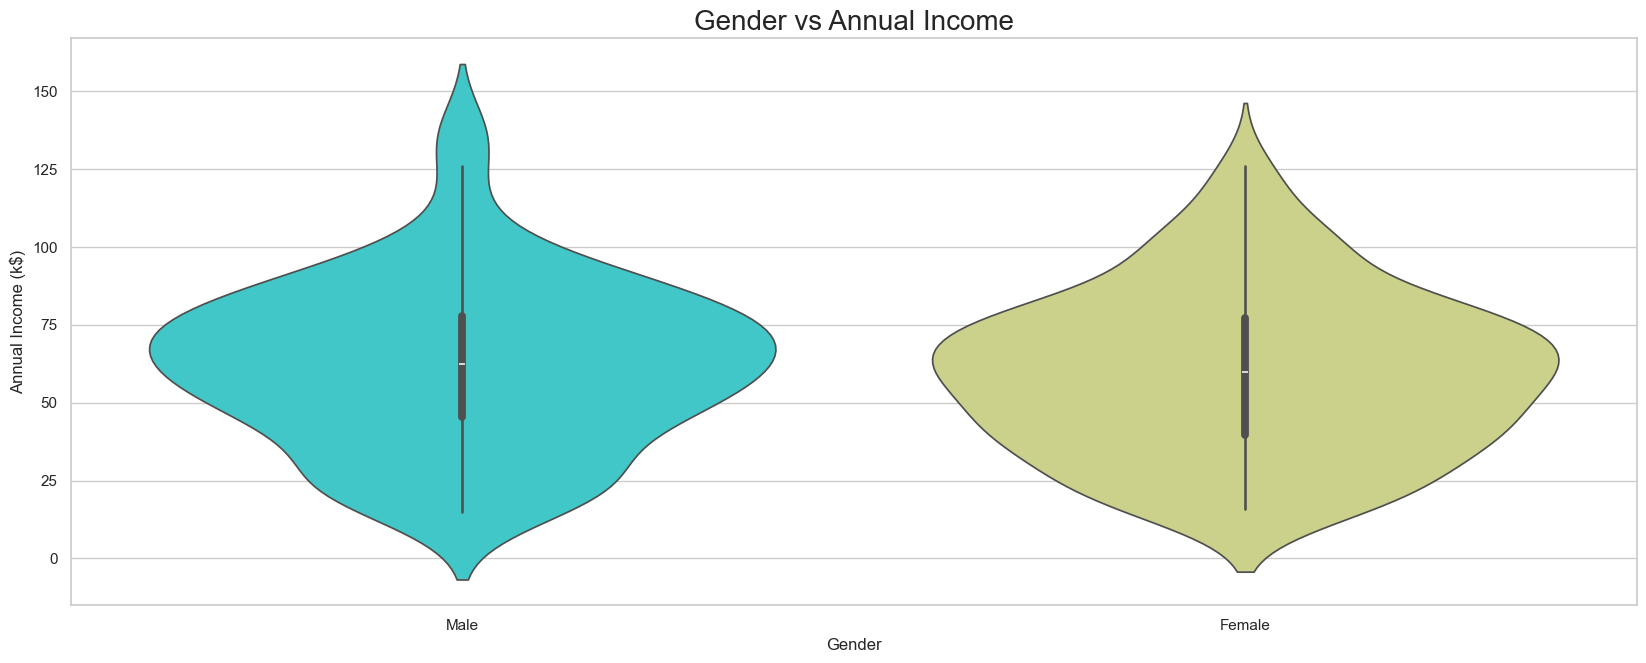

In [21]:
## Gender vs Annual Income

plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(x=data['Gender'], y=data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

> Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.
>> There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income. 

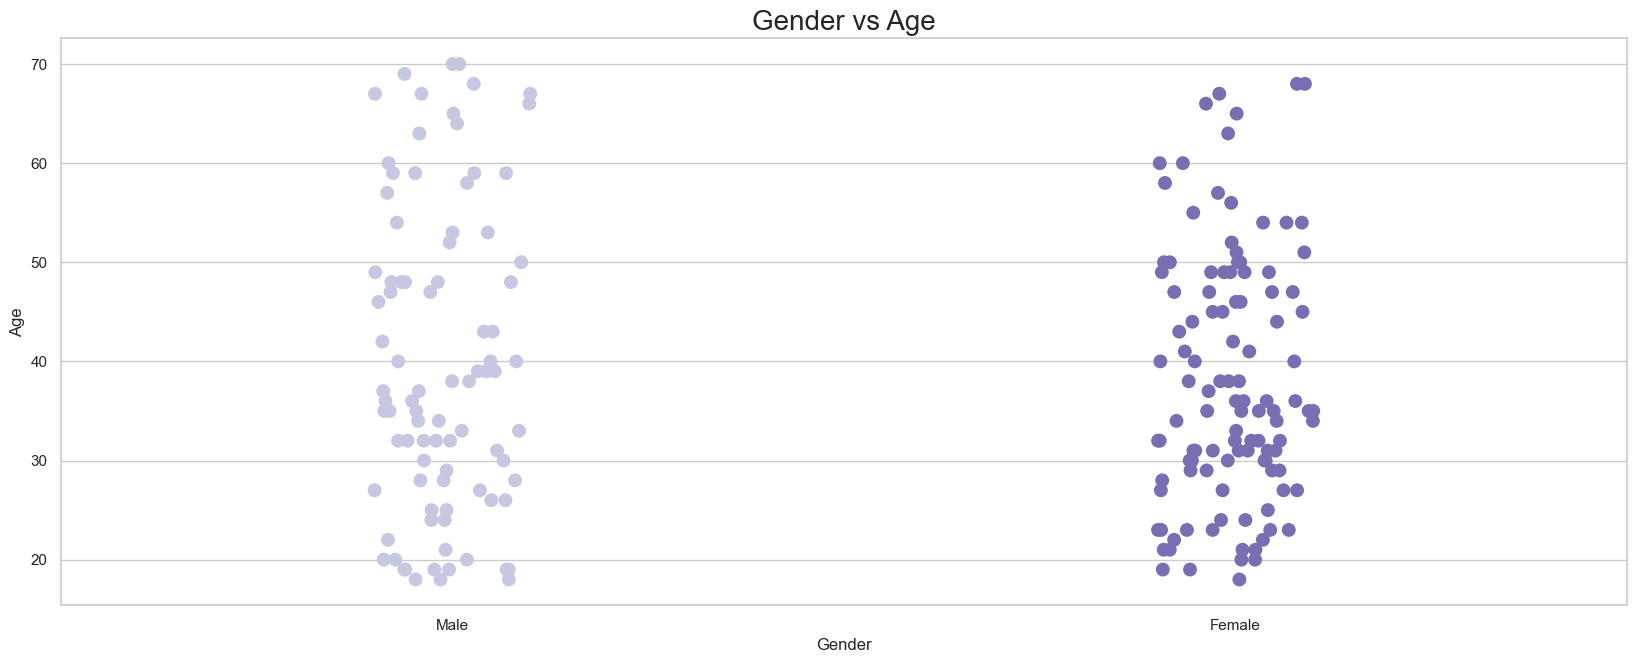

In [22]:
# Gender vs Age

plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(x=data['Gender'], y=data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()

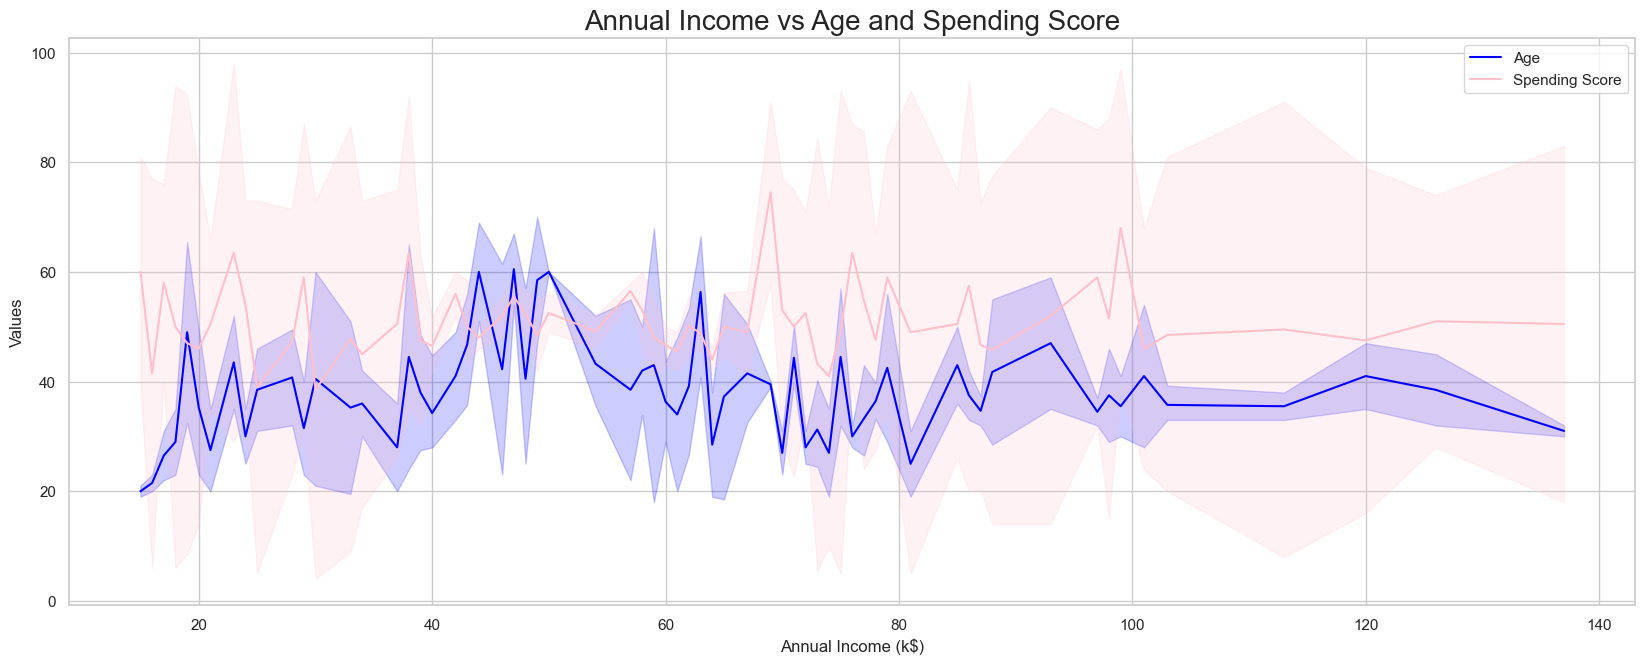

In [23]:
# Annual Income vs Age and Spending Score

x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x=x, y=y, color = 'blue', label='Age')
sns.lineplot(x=x, y=z, color = 'pink', label='Spending Score')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Values')
plt.legend()
plt.show()

> The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a pink color. shows how Age and Spending Score Varies with Annual Income.

## Clustering Analysis

In [24]:
# we want to perform clusters of Customers who share similar behaviour for that lets select the columns
# Spending score, and Annual Income

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

# let's check the shape of x
print(x.shape)

(200, 2)


In [25]:
# lets also check the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)
x_data.head()
# where o->Spending Score, and 1->Annual Income

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

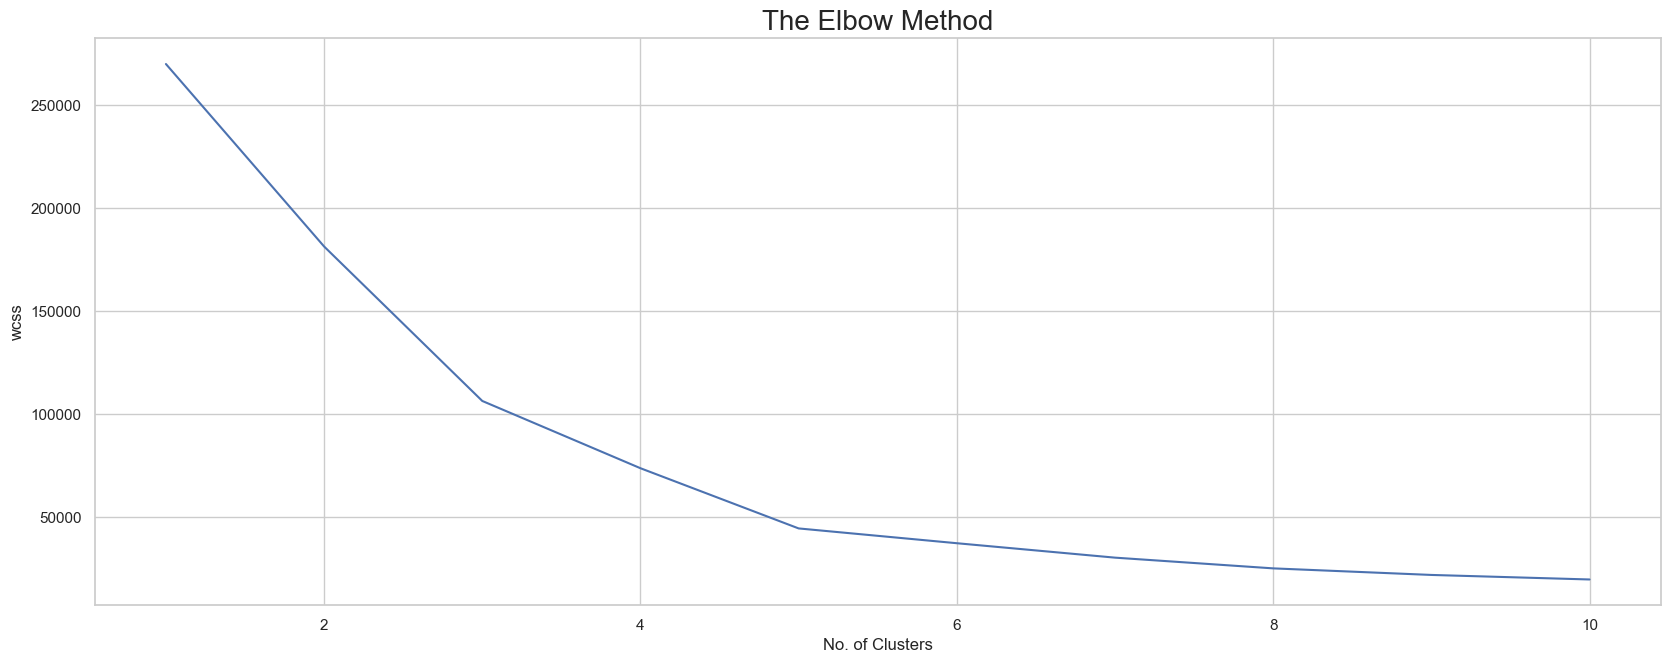

In [26]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**The Silhouette Score Method to find the No. of Optimal Clusters**

For k=2, Silhouette Score = 0.2969
For k=3, Silhouette Score = 0.4676
For k=4, Silhouette Score = 0.4932
For k=5, Silhouette Score = 0.5539
For k=6, Silhouette Score = 0.5380
For k=7, Silhouette Score = 0.5264
For k=8, Silhouette Score = 0.4554
For k=9, Silhouette Score = 0.4554
For k=10, Silhouette Score = 0.4476


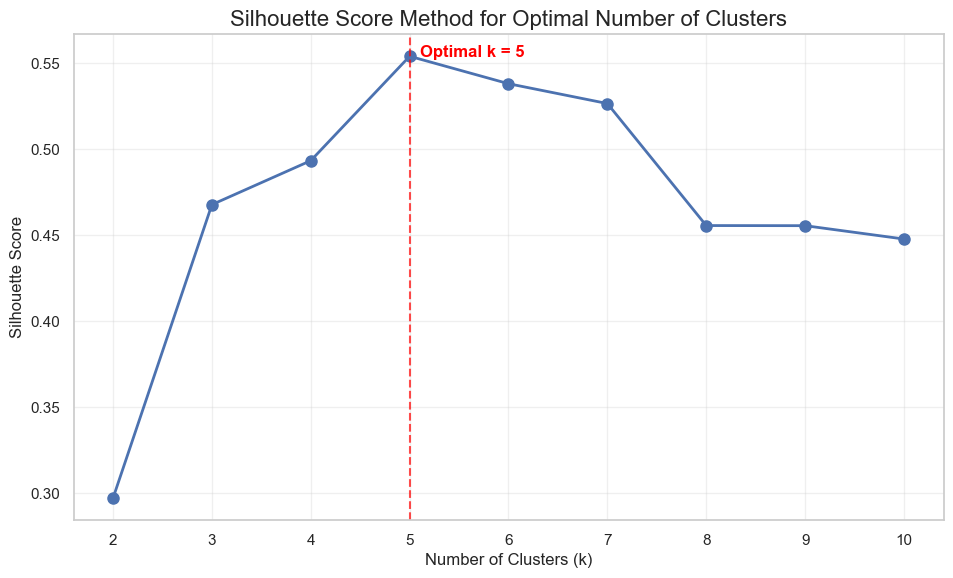


Optimal number of clusters based on Silhouette Score: 5
Maximum Silhouette Score: 0.5539


In [27]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different number of clusters
silhouette_scores = []
K_range = range(2, 11)  # Start from 2 because silhouette score needs at least 2 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For k={k}, Silhouette Score = {silhouette_avg:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', linewidth=2, markersize=8)
plt.title('Silhouette Score Method for Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Find and highlight the optimal number of clusters
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7)
plt.text(optimal_k + 0.1, max(silhouette_scores), f'Optimal k = {optimal_k}', 
         fontsize=12, color='red', fontweight='bold')

plt.show()

print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")
print(f"Maximum Silhouette Score: {max(silhouette_scores):.4f}")

**Comparison of Methods for Finding Optimal Clusters**

> **Silhouette Score Analysis:**
>> The Silhouette Score measures how similar a data point is to its own cluster compared to other clusters.
>> Scores range from -1 to 1, where:
>>> - **1**: Perfect clustering (data point is very close to its cluster and far from other clusters)
>>> - **0**: Data point is on or very close to the decision boundary between clusters
>>> - **-1**: Data point might be assigned to the wrong cluster

> **How to Interpret:**
>> - **Higher Silhouette Score** = Better clustering quality
>> - Look for the **peak value** in the silhouette score plot
>> - Compare with the **Elbow Method** results for validation

> **Decision Making:**
>> Use both methods together to make an informed decision about the optimal number of clusters. If both methods suggest the same number of clusters, you can be more confident in your choice.

**Visualizaing the Clusters**

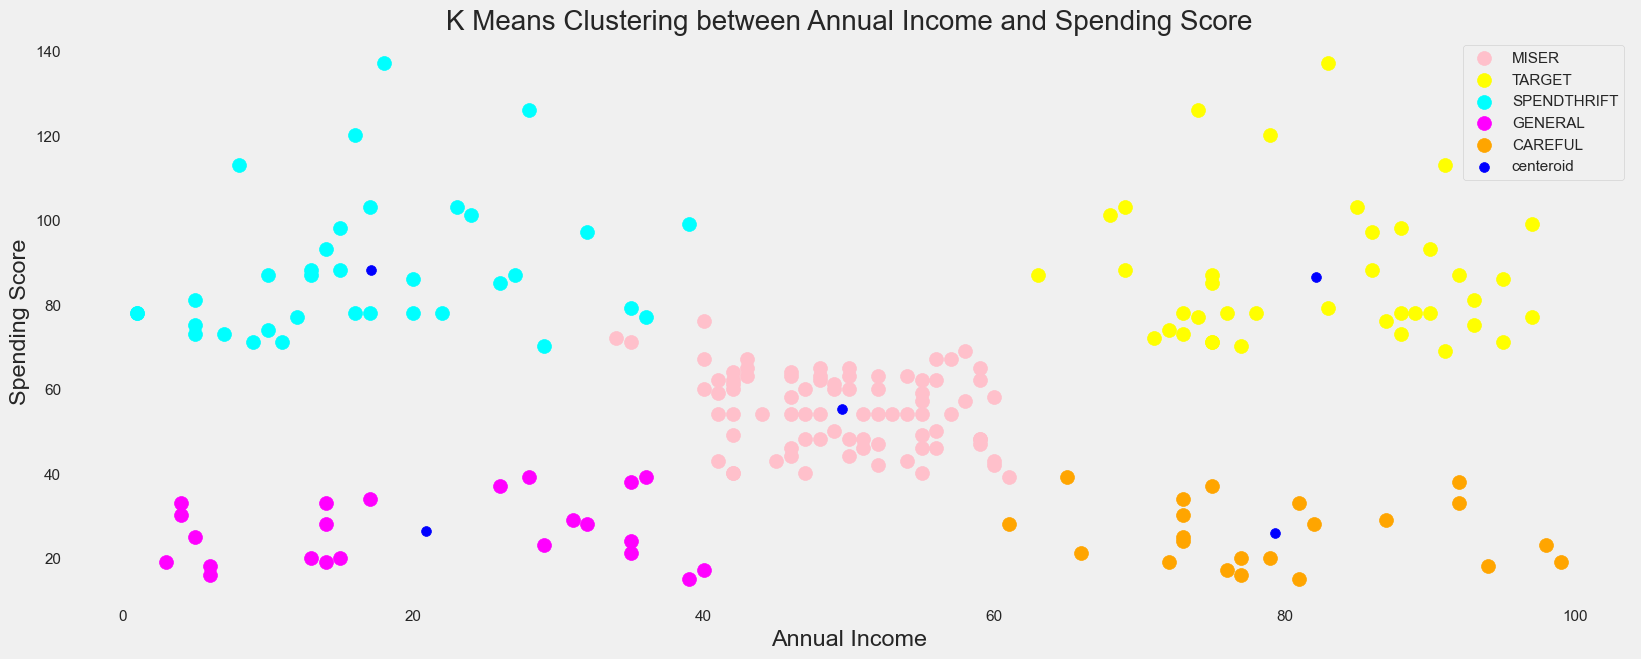

In [28]:
# lets visualize these clusters

plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'MISER')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'TARGET')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'SPENDTHRIFT')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'GENERAL')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'CAREFUL')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

> This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers namely Miser, General, Target, Spendthrift,  Careful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

### Clustering between Age and Spending Score

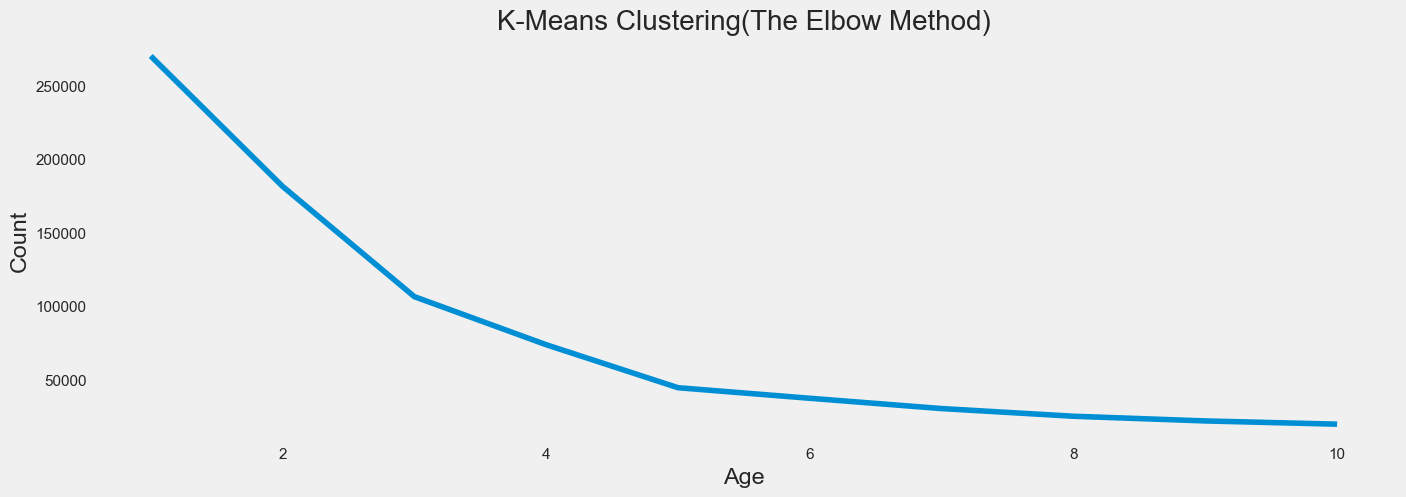

In [29]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

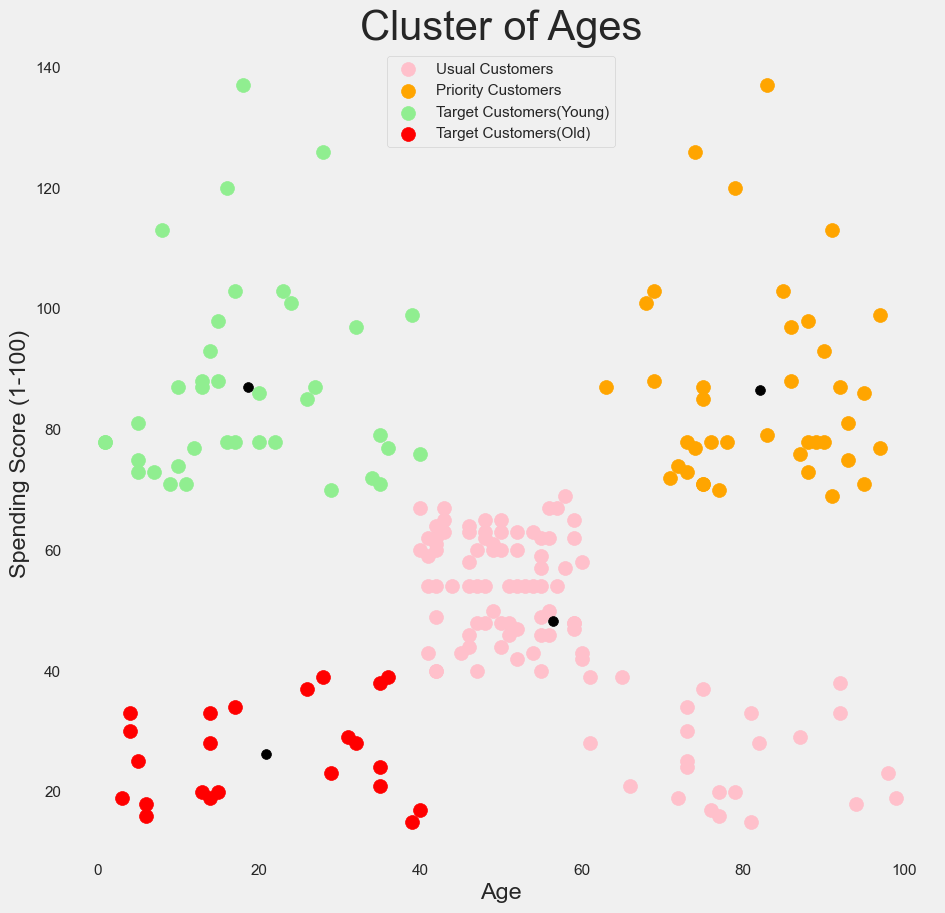

In [30]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

Silhouette Score Analysis for Age vs Spending Score Clustering:
For k=2, Silhouette Score = 0.4692
For k=3, Silhouette Score = 0.4530
For k=4, Silhouette Score = 0.4997
For k=5, Silhouette Score = 0.4453
For k=6, Silhouette Score = 0.4466
For k=7, Silhouette Score = 0.4231
For k=8, Silhouette Score = 0.4322
For k=9, Silhouette Score = 0.4161
For k=10, Silhouette Score = 0.4096


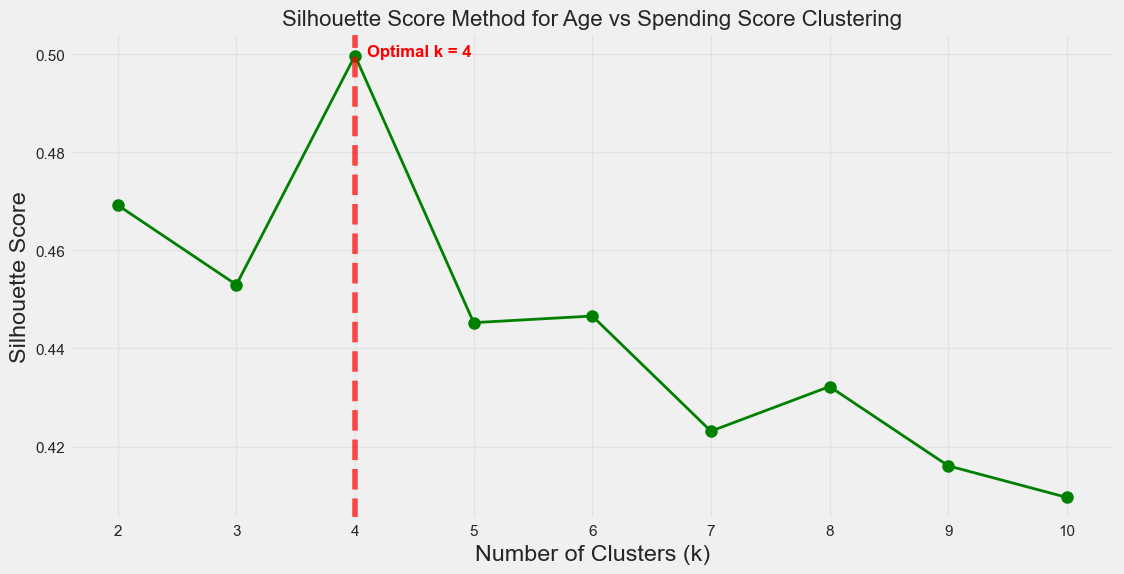


Optimal number of clusters for Age vs Spending Score: 4
Maximum Silhouette Score: 0.4997


In [31]:
# Add this code after the Age vs Spending Score clustering section

# First, let's prepare the data for Age and Spending Score clustering
x_age_spending = data.loc[:, ['Age', 'Spending Score (1-100)']].values

# Calculate silhouette scores for Age and Spending Score clustering
from sklearn.metrics import silhouette_score

silhouette_scores_age = []
K_range = range(2, 11)  # Start from 2 because silhouette score needs at least 2 clusters

print("Silhouette Score Analysis for Age vs Spending Score Clustering:")
print("=" * 60)

for k in K_range:
    kmeans_age = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels_age = kmeans_age.fit_predict(x_age_spending)
    silhouette_avg_age = silhouette_score(x_age_spending, cluster_labels_age)
    silhouette_scores_age.append(silhouette_avg_age)
    print(f"For k={k}, Silhouette Score = {silhouette_avg_age:.4f}")

# Plot the silhouette scores for Age vs Spending Score
plt.figure(figsize=(12, 6))
plt.plot(K_range, silhouette_scores_age, marker='o', linewidth=2, markersize=8, color='green')
plt.title('Silhouette Score Method for Age vs Spending Score Clustering', fontsize=16)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Find and highlight the optimal number of clusters
optimal_k_age = K_range[silhouette_scores_age.index(max(silhouette_scores_age))]
plt.axvline(x=optimal_k_age, color='red', linestyle='--', alpha=0.7)
plt.text(optimal_k_age + 0.1, max(silhouette_scores_age), f'Optimal k = {optimal_k_age}', 
         fontsize=12, color='red', fontweight='bold')

plt.show()

print(f"\nOptimal number of clusters for Age vs Spending Score: {optimal_k_age}")
print(f"Maximum Silhouette Score: {max(silhouette_scores_age):.4f}")

>According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers, Young Target Customers. Then after getting the results we can accordingly make different marketing strategies and policies to  optimize the spending scores of the customer in the Mall.